Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

Loading Dataset


In [2]:
dt=pd.read_csv("Crop_Recommendation.csv")
x=dt.iloc[:,:-1].values
y=dt.iloc[:,-1].values

In [3]:
dt.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
print(x)

[[ 90.          42.          43.         ...  82.00274423   6.50298529
  202.9355362 ]
 [ 85.          58.          41.         ...  80.31964408   7.03809636
  226.6555374 ]
 [ 60.          55.          44.         ...  82.3207629    7.84020714
  263.9642476 ]
 ...
 [118.          33.          30.         ...  67.22512329   6.36260785
  173.3228386 ]
 [117.          32.          34.         ...  52.12739421   6.75879255
  127.1752928 ]
 [104.          18.          30.         ...  60.39647474   6.77983261
  140.9370415 ]]


In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [5]:
print(y)

[20 20 20 ...  5  5  5]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

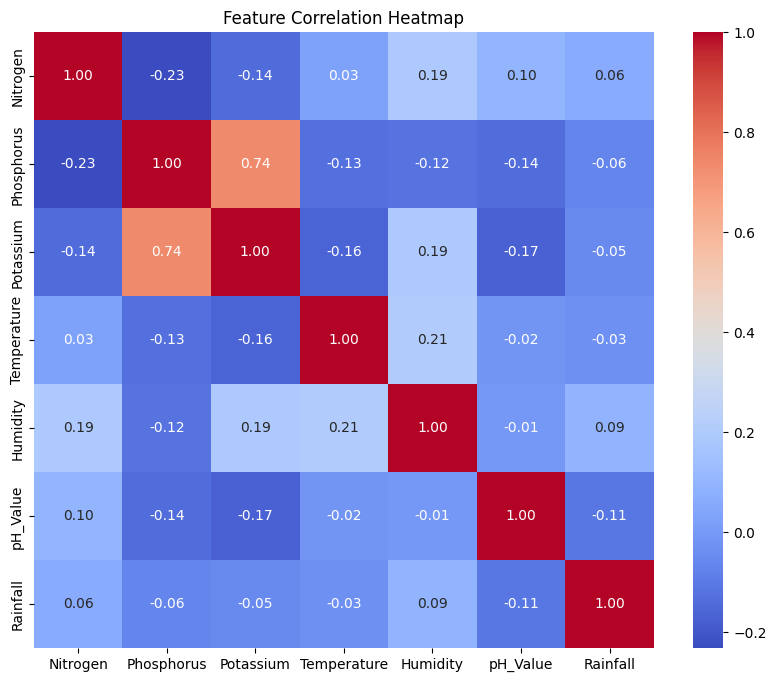

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = dt.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


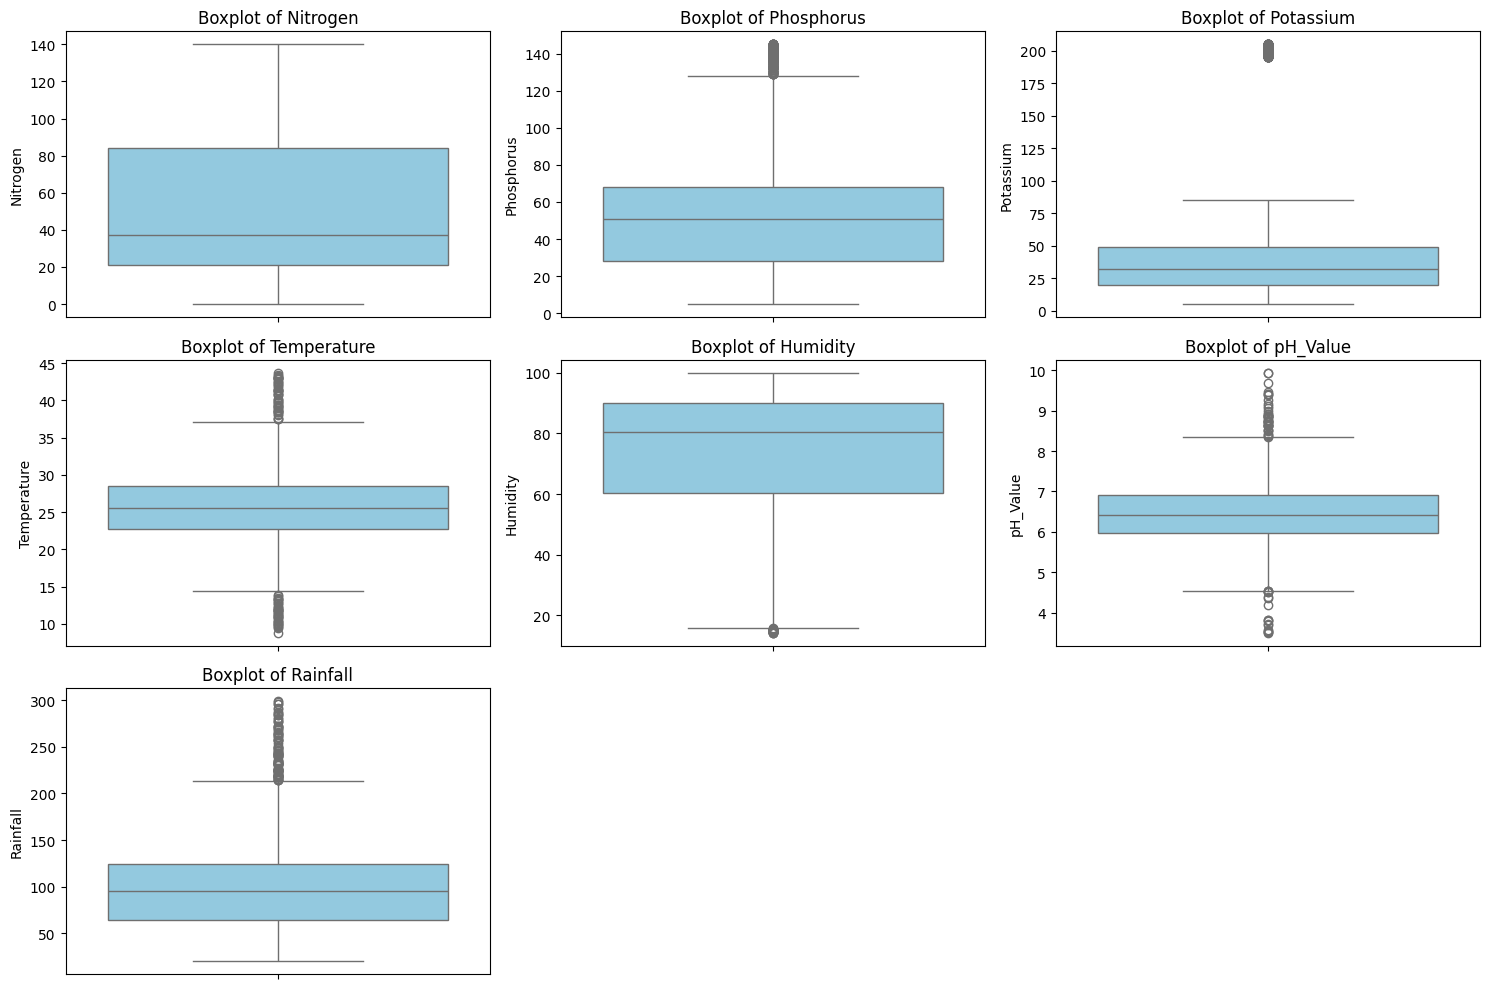

In [17]:
numeric_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=dt[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [11]:
y_pred=rf.predict(x_test)

In [12]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[21, 21],
       [21, 21],
       [ 7,  7],
       [ 3,  3],
       [ 2,  2],
       [20, 20],
       [13, 13],
       [ 9,  9],
       [15, 15],
       [ 1,  1],
       [13, 13],
       [ 5,  5],
       [10, 10],
       [14, 14],
       [12, 12],
       [ 0,  0],
       [ 5,  5],
       [10, 10],
       [ 5,  5],
       [12, 12],
       [ 4,  4],
       [ 2,  2],
       [ 9,  9],
       [ 8,  8],
       [ 6,  6],
       [ 5,  5],
       [10, 10],
       [16, 16],
       [13, 13],
       [ 9,  9],
       [19, 19],
       [20, 20],
       [11, 11],
       [15, 15],
       [ 4,  4],
       [ 6,  6],
       [12, 12],
       [12, 12],
       [21, 21],
       [13, 13],
       [11, 11],
       [ 2,  2],
       [18, 18],
       [21, 21],
       [18, 18],
       [14, 14],
       [ 9,  9],
       [ 9,  9],
       [ 6,  6],
       [14, 14],
       [13, 13],
       [ 2,  2],
       [ 0,  0],
       [15, 15],
       [18, 18],
       [ 1,  1],
       [17, 17],
       [12, 12],
       [10, 10

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cnf=confusion_matrix(y_test,y_pred)
print(cnf)

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [14]:
accuracy_score(y_test,y_pred)

0.9954545454545455

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score : ", f1)

F1 Score :  0.9954545454545455


In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)

0.9954545454545455


In [ ]:
n=float(input("Enter the ratio of Nitrogen in soil : "))
p=float(input("Enter the ratio of Phosphorous in soil : "))
k=float(input("Enter the ratio of Potassium in soil : "))
t=float(input("Enter the Temperature in celsius : "))
h=float(input("Enter th Humidity in % value : "))
p=float(input("Enter the pH Value : "))
r=float(input("Enter the rainfall in cm : "))
X=np.array([[n,p,k,t,h,p,r]])
X=sc.transform(X)
Y=rf.predict(X)
print("Most Suitable Crop for your Conditions is : "+lb.inverse_transform(Y))

Enter the ratio of Nitrogen in soil : 70
Enter the ratio of Phosphorous in soil : 55
Enter the ratio of Potassium in soil : 62
Enter the Temperature in celsius : 36
Enter th Humidity in % value : 75
Enter the pH Value : 7.6
Enter the rainfall in cm : 150.6
['Most Suitable Crop for your Conditions is : Watermelon']
